In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from data_reader import read_data
from data_preprocessing import preprocess_data
from feature_extractor import extract_features

%matplotlib inline

In [2]:
data = preprocess_data(read_data())
data.head()

,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,StatusCode,SuppliersCount,IsWinner,ResultClass
0,0100600000117000001,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000001,2017-04-13,Закупка у единственного поставщика (подрядчика...,1310000.0,1310000.0,RUB,Размещение завершено,2.0,0.0,0.0,0.0
1,0100600000117000002,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000002,2017-04-13,Закупка у единственного поставщика (подрядчика...,249000.0,249000.0,RUB,Размещение завершено,2.0,0.0,0.0,0.0
2,0100600000117000003,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000003,2017-07-06,Закупка у единственного поставщика (подрядчика...,250000.0,250000.0,RUB,Размещение завершено,2.0,0.0,0.0,0.0
3,0100600000117000004,Выполнение работ по ремонту автомобильной доро...,https://zakupki.kontur.ru/0100600000117000004,2017-07-06,Запрос котировок,400300.0,400300.0,RUB,Размещение завершено,2.0,2.0,1.0,1.0
4,0100600000117000005,Приобретение и установка спортивного оборудования,https://zakupki.kontur.ru/0100600000117000005,2017-07-10,Запрос котировок,451000.0,451000.0,RUB,Размещение завершено,2.0,1.0,0.0,0.0


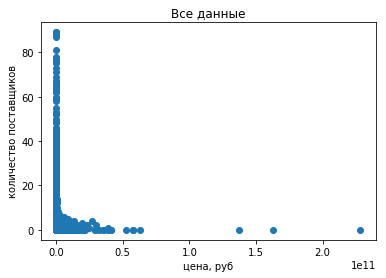

In [3]:
plt.scatter(data['RubPrice'], data['SuppliersCount'])
plt.title("Все данные")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

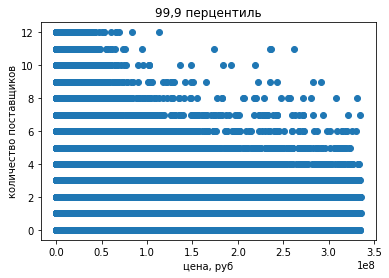

In [4]:
data_nn = data[(~np.isnan(data['RubPrice'])) & (~np.isnan(data['SuppliersCount']))]
data95 = data_nn[(data_nn['RubPrice'] < np.percentile(data_nn['RubPrice'], 99.9)) &
                 (data_nn['SuppliersCount'] < np.percentile(data_nn['SuppliersCount'], 99.9))]
plt.scatter(data95['RubPrice'], data95['SuppliersCount'])
plt.title("99,9 перцентиль")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

In [5]:
for i in range(50):
    print(len(data[data['SuppliersCount'] == i]))

3418290
1418952
1002647
622264
396890
245953
147277
85057
47535
26357
14530
8095
4783
2691
1634
1038
610
451
301
207
180
132
95
61
52
35
30
28
17
20
38
32
31
10
11
10
7
12
8
11
17
22
25
21
20
7
2
0
1
1


In [6]:
len(data['CurrencyCode'].unique())

36

In [7]:
len(data['ProcedureDisplayName'].unique())

35

In [8]:
data_unbalanced = data.head(1000000)
features_unbalanced = extract_features(data_unbalanced)

In [9]:
def ngrams(data, column):
    return data.columns[data.columns.str.startswith(f'Ngrams_{column}_')].tolist()

def onehots(data, column):
    return data.columns[data.columns.str.startswith(f'OneHot_{column}_')].tolist()

In [18]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ['RubPrice']]
y = data_unbalanced['SuppliersCount']
len(X), len(y)

(1016006, 1000000)

In [12]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

ValueError: Found input variables with inconsistent numbers of samples: [1016006, 1000000]

In [ ]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# from sklearn.svm import LinearSVR
# cross_val_score(LinearSVR(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# cross_val_score(RandomForestRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_absolute_error').mean()

In [13]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [14]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [15]:
# param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# optimizer = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=3)
# optimizer.fit(X, y)
# optimizer.best_estimator_.coef_, optimizer.best_score_

In [16]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName') + ['RubPrice']]
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [17]:
g = data.groupby('SuppliersCount')
data_balanced = g.apply(lambda x: x.head(8095)).sample(frac=1).reset_index(drop=True)
data_balanced

,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,StatusCode,SuppliersCount,IsWinner,ResultClass
0,0101100000917000081,Оказание услуг по пересылке почтовой корреспон...,https://zakupki.kontur.ru/0101100000917000081,2017-05-17,Закупка у единственного поставщика (подрядчика...,301815.00,301815.00,RUB,Размещение завершено,2.0,0.0,0.0,0.0
1,0372200191515000022,Cервисное обслуживание систем приточной и вытя...,https://zakupki.kontur.ru/0372200191515000022,2015-12-07,Электронный аукцион,96956.67,96956.67,RUB,Размещение завершено,2.0,14.0,1.0,1.0
2,0118300006917000040,Поставка товаров (призов) - фоторамки,https://zakupki.kontur.ru/0118300006917000040,2017-04-28,Электронный аукцион,55470.00,55470.00,RUB,Размещение завершено,2.0,11.0,1.0,1.0
3,0101200009516005159,Электронный аукцион [g061046213/6631g] на прав...,https://zakupki.kontur.ru/0101200009516005159,2016-11-19,Электронный аукцион,504819.70,504819.70,RUB,Размещение завершено,2.0,3.0,1.0,1.0
4,0109100007417000069,Поставка аккумуляторных батарей (АКБ),https://zakupki.kontur.ru/0109100007417000069,2017-06-20,Электронный аукцион,46296.87,46296.87,RUB,Размещение завершено,2.0,4.0,1.0,1.0
5,0101200009516003535,Электронный аукцион [g000447241/4545g] на прав...,https://zakupki.kontur.ru/0101200009516003535,2016-08-30,Электронный аукцион,711760.00,711760.00,RUB,Размещение завершено,2.0,2.0,1.0,1.0
6,0111300000816002209,поставка хозяйственных товаров субъектами мало...,https://zakupki.kontur.ru/0111300000816002209,2016-11-11,Электронный аукцион,42384.00,42384.00,RUB,Размещение завершено,2.0,4.0,1.0,1.0
7,0161300000117000170,"Капитальный ремонт водоотведения, водоснабжени...",https://zakupki.kontur.ru/0161300000117000170,2017-03-13,Электронный аукцион,14566929.00,14566929.00,RUB,Размещение завершено,2.0,9.0,1.0,1.0
8,0306200019716000063,Поставка одежды и обуви,https://zakupki.kontur.ru/0306200019716000063,2016-09-12,Электронный аукцион,2083543.54,2083543.54,RUB,Размещение завершено,2.0,10.0,1.0,1.0
9,0111300000815002726,оказание услуг по охране гостиницы «Лесная» дл...,https://zakupki.kontur.ru/0111300000815002726,2015-11-30,Электронный аукцион,515424.00,515424.00,RUB,Размещение завершено,2.0,4.0,1.0,1.0


In [20]:
features_balanced = extract_features(data_balanced)
X = features_balanced[ngrams(features_balanced, 'Title') + ['RubPrice']]
y = data_balanced['SuppliersCount']

In [21]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-22.404011129664255

In [22]:
X = features_balanced[ngrams(features_balanced, 'Title') + onehots(features_balanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-13.697508480367636

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)
clf = Ridge()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
mean_squared_error(pred, y_test)

13.816123333519808